# World Happiness Report
2015 - 2017 data, starting with 2015 dataset

Important points from overview: www.kaggle.com/unsdsn/world-happiness/home

## Content
The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale. The scores are from nationally representative samples for the years 2013-2016 and use the Gallup weights to make the estimates representative. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

## Columns succeeding happiness score
The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country. The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country as stated in the previous answer. 
#### If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

In [45]:
# ALL imports in topmost cell
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style; matplotlib.style.use('ggplot')

In [2]:
df = pd.read_csv('data//2015.csv')

In [3]:
# happy countries
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
# unhappy countries
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [5]:
# see features
list(df)

['Country',
 'Region',
 'Happiness Rank',
 'Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

In [6]:
# confirm: sum of last six columns is the happiness score
sum(df.iloc[0, 5:]), df.iloc[0, 3]

(7.5869599999999995, 7.587000000000001)

In [8]:
# 'normalize' data
# for each country, divide rightmost 5 features by the happiness score, should sum to 1
df.loc[:, 'Economy (GDP per Capita)':] = df.loc[:, 'Economy (GDP per Capita)':].values \
                                         / df['Happiness Score'].values.reshape(-1, 1)

In [11]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,0.184066,0.177871,0.124085,0.087725,0.055329,0.039117,0.331802
1,Iceland,Western Europe,2,7.561,0.04884,0.172242,0.185456,0.125359,0.083160,0.018708,0.057704,0.357361
2,Denmark,Western Europe,3,7.527,0.03328,0.176097,0.180760,0.116200,0.086273,0.064245,0.045355,0.331080
3,Norway,Western Europe,4,7.522,0.03880,0.193964,0.176941,0.117683,0.089036,0.048528,0.046130,0.327747
4,Canada,North America,5,7.427,0.03553,0.178577,0.178081,0.121938,0.085226,0.044375,0.061682,0.330114


In [12]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.064092,0.223290,0.123706,0.170854,0.159281,0.065304,0.193483
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.085823,0.105946,0.095539,0.145060,0.023982,0.054671,0.489006
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.220625,0.157981,0.240163,0.052176,0.062894,0.156949,0.109308
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.005267,0.143157,0.077095,0.040792,0.034637,0.067907,0.630988
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.073505,0.049296,0.100187,0.128401,0.037799,0.058757,0.552046


Normalization worked! This solves the issue described in the overview. Namely, happiness score was the sum of the component features, so a machine learning model attempting to predict happiness score could simply sum the component features to get the exact result! 

Now, we have percentages, in a sense. For each country, we have the percent by which each feature (economy, family, health, etc.) contributed to the happiness score. Perhaps we will find some interesting correlations -- will some features strongly correlate with happiness?

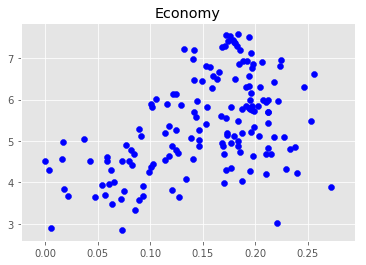

In [74]:
plt.title('Economy')
plt.scatter(df['Economy (GDP per Capita)'], df['Happiness Score'], c='b');

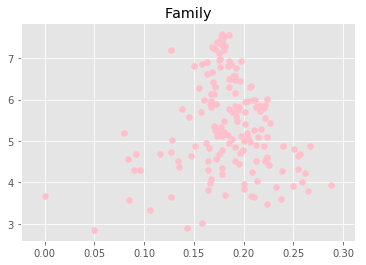

In [75]:
plt.title('Family')
plt.scatter(df['Family'], df['Happiness Score'], c='pink');

In [96]:
# where was family least important?
df[df['Family'] < 0.06].Country

147    Central African Republic
157                        Togo
Name: Country, dtype: object

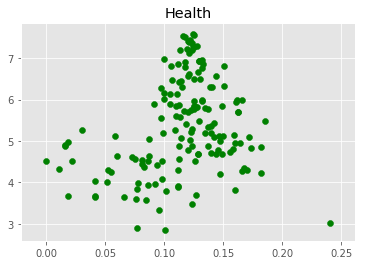

In [76]:
plt.title('Health')
plt.scatter(df['Health (Life Expectancy)'], df['Happiness Score'], c='g');

In [92]:
# outlier: where was health most important?
df[df['Health (Life Expectancy)'] > 0.20].Country

155    Syria
Name: Country, dtype: object

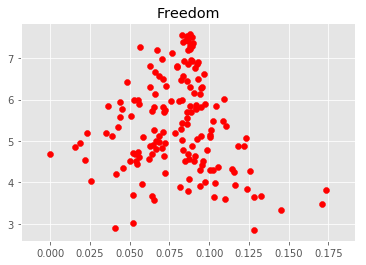

In [77]:
plt.title('Freedom')
plt.scatter(df['Freedom'], df['Happiness Score'], c='r');

In [100]:
# where did freedom matter most?
df[df['Freedom'] > 0.15].Country

144    Cambodia
153      Rwanda
Name: Country, dtype: object

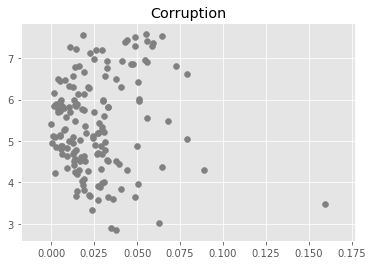

In [78]:
plt.title('Corruption')
plt.scatter(df['Trust (Government Corruption)'], df['Happiness Score'], c='grey');

In [98]:
# where was trust in the government most important to happiness?
df[df['Trust (Government Corruption)'] > 0.15].Country

153    Rwanda
Name: Country, dtype: object

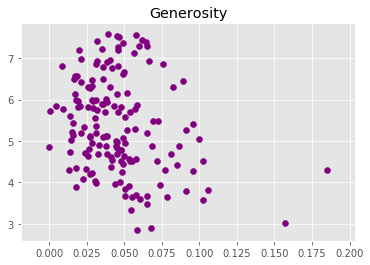

In [79]:
plt.title('Generosity')
plt.scatter(df['Generosity'], df['Happiness Score'], c='purple');

In [99]:
# where did generosity matter most?
df[df['Generosity'] > 0.15].Country

128    Myanmar
155      Syria
Name: Country, dtype: object

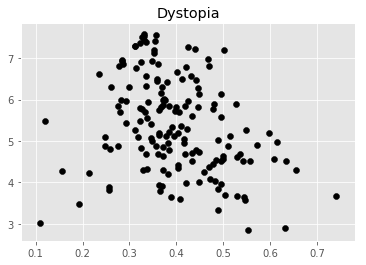

In [80]:
plt.title('Dystopia')
plt.scatter(df['Dystopia Residual'], df['Happiness Score'], c='k');